In [8]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter('ignore')

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

# make user code available:
import sys
from pathlib import Path
module_path = str(Path('../src').absolute())
if module_path not in sys.path:
    sys.path.insert(0, module_path)

# curated_tracks - cell tracks syncronized on 1 division events
# double_division_tracks - cell tracks syncronized on 2 division events
from const import double_division_tracks, curated_tracks, DATA_ROOT

import pickle
import numpy as np
from numpy import savez_compressed, load
import pandas as pd
import cv2
import sompy
from scipy.interpolate import interp1d, NearestNDInterpolator
from scipy.stats import pearsonr

%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
plt.style.use('_classic_test')

from notebook_functions import umap_transform, plot_distributions,\
                timelapse_single_frame_sync, timelapse_double_frame_sync,\
                circular_tracking, normalize_intensities, project_onto_fluo_plane

log_const = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
with open(DATA_ROOT / 'descriptors256.r34_256.sz48.pkl', 'rb') as f:
    y, descriptors, intensities, df_index = pickle.load(f)

In [ ]:
embeddings_preds, fit = umap_transform(descriptors, n_neighbors=300, min_dist=0.05, n_components=2, metric='correlation')

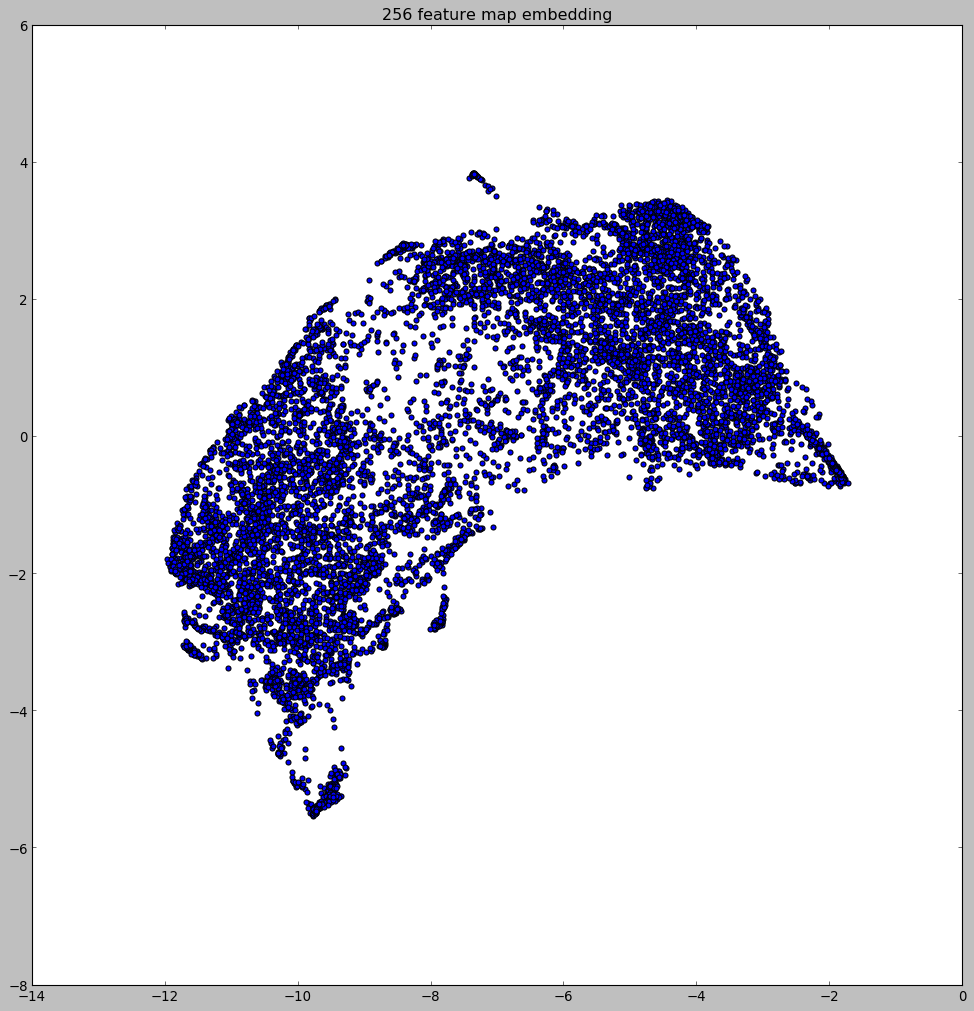

In [76]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(embeddings_preds[:, 0], embeddings_preds[:, 1])
plt.title('256 feature map embedding')
plt.show()

In [ ]:
embeddings_intensities, fit = umap_transform(intensities, n_neighbors=300, min_dist=0.05, n_components=2, metric='correlation')

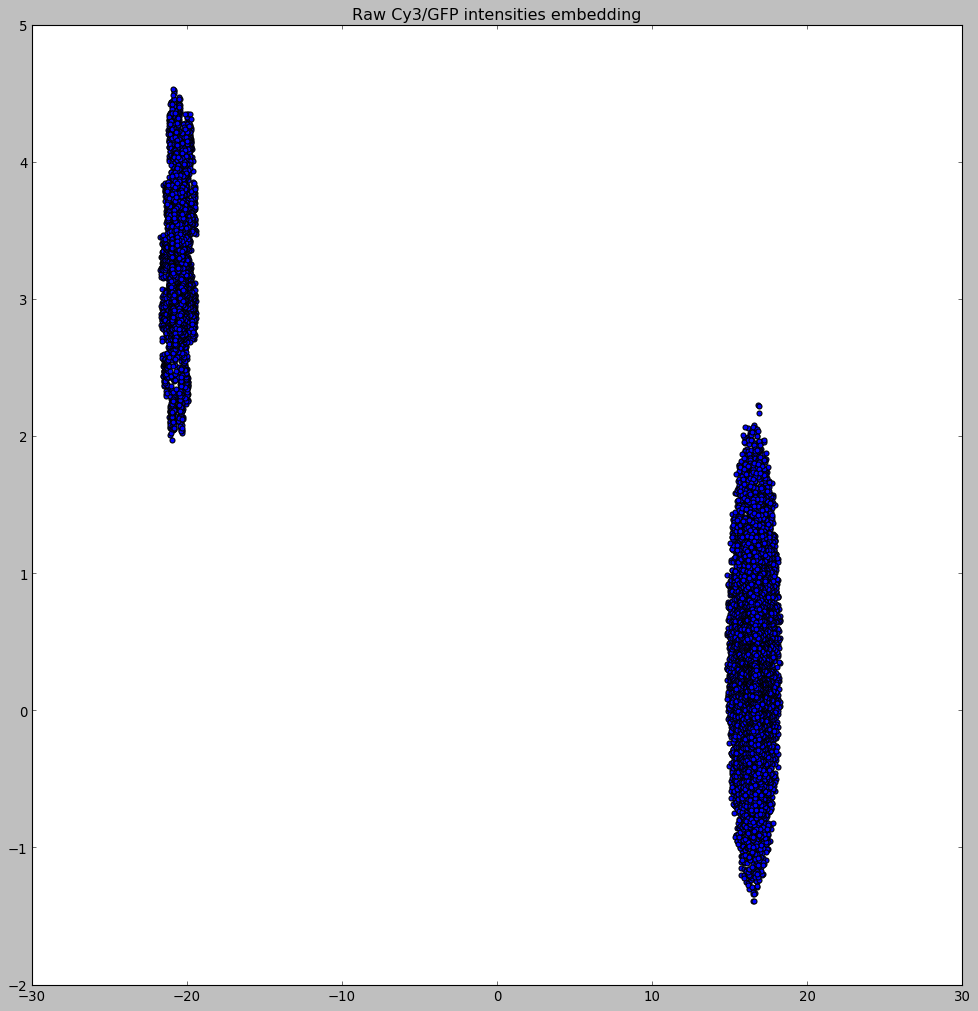

In [77]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(embeddings_intensities[:, 0], embeddings_intensities[:, 1])
plt.title('Raw Cy3/GFP intensities embedding')
plt.show()

In [90]:
df = pd.DataFrame(np.hstack([embeddings_intensities, embeddings_preds]), index=df_index.flat,
             columns=['embeddings_intensities_x', 'embeddings_intensities_y', 'embeddings_256_x', 'embeddings_256_y'])
df.index.name = 'index'
df.to_csv(DATA_ROOT / 'aux_experiments.csv')